In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
sns.set()
from sklearn.cluster import KMeans

In [2]:
path = 'project1-ds_santander-f3-team6-data_analysis_in_Phyton/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.csv'
df = pd.read_csv(path)
df = df.drop(['bikeshop.id'], axis = 1)
df.head()

,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886
1,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3,Detroit Cycles,Detroit,MI,42.331427,-83.045754
4,Cincinnati Speed,Cincinnati,OH,39.103118,-84.512020


# Selección de atributos

In [3]:
X = df.iloc[:, 3:5]
X

,latitude,longitude
0,40.440625,-79.995886
1,42.443961,-76.501881
2,39.961176,-82.998794
3,42.331427,-83.045754
4,39.103118,-84.512020
5,38.252665,-85.758456
6,36.162664,-86.781602
7,39.739236,-104.990251
8,44.977753,-93.265011
9,39.114053,-94.627464


## Encontrando el número óptimo de Clusters

In [4]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Dr. Malvavisco\.conda\envs\datasciencepython3106\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dr. Malvavisco\.conda\envs\datasciencepython3106\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dr. Malvavisco\.conda\envs\datasciencepython3106\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dr. Malvavisco\.conda\envs\d

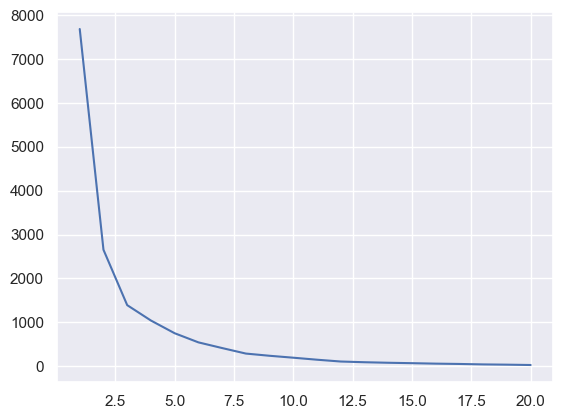

In [5]:
number_clusters = list(range(1,21))
plt.plot(number_clusters, wcss)
plt.show()

Podemos observar que el número óptimo de clusters sería de 8 a 10

## Clustering y Resultados

In [6]:
kmeans = KMeans(8)
kmeans.fit(X)

C:\Users\Dr. Malvavisco\.conda\envs\datasciencepython3106\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [7]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

C:\Users\Dr. Malvavisco\.conda\envs\datasciencepython3106\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 0, 0, 0, 0, 4, 3, 3, 2, 7, 3, 4, 7, 4, 1, 1, 1, 5, 5, 0,
       2, 2, 7, 6, 7, 3, 0, 6])

In [8]:
data_clusters = df.copy()
data_clusters['Cluster'] = identified_clusters
data_clusters.head()

,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude,Cluster
0,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886,0
1,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881,2
2,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794,0
3,Detroit Cycles,Detroit,MI,42.331427,-83.045754,0
4,Cincinnati Speed,Cincinnati,OH,39.103118,-84.512020,0


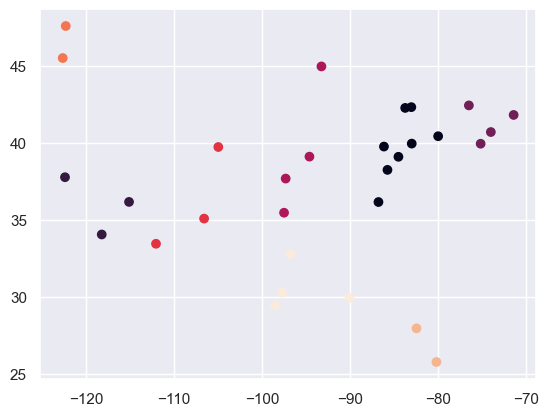

In [9]:
plt.scatter(data_clusters['longitude'], data_clusters['latitude'], c =  data_clusters['Cluster'])
plt.show()